In [52]:
from datetime import datetime
from datetime import timezone
import polars as pl
import os
from plot_data import plot_sensor_measurement, plot_sensor_calibration, plot_wind_rose


start_date = datetime(2023, 10, 3, 0, 0, 0).replace(tzinfo=timezone.utc)
end_date = datetime(2023, 10, 3, 23, 59, 59).replace(tzinfo=timezone.utc)

sensor_id = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20]
quickflow_directory = "/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/quickflow/acropolis/"


In [53]:
df = pl.scan_parquet(os.path.join(quickflow_directory, "measurements.parquet"))

df = df.sort("creation_timestamp").filter(pl.col("creation_timestamp").is_between(start_date, end_date))

df.tail(5).collect()

revision,creation_timestamp,receipt_timestamp,sht45_humidity,gmp343_raw,gmp343_temperature,bme280_humidity,gmp343_compensated,gmp343_filtered,bme280_temperature,bme280_pressure,sht45_temperature,raspi_cpu_usage,enclosure_bme280_humidity,raspi_disk_usage,enclosure_bme280_temperature,raspi_cpu_temperature,enclosure_bme280_pressure,raspi_memory_usage,wxt532_direction_max,wxt532_direction_avg,wxt532_speed_avg,wxt532_last_update_time,wxt532_speed_min,wxt532_direction_min,wxt532_speed_max,sensor_name,configuration
i32,"datetime[ns, UTC]","datetime[ns, UTC]",f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
11,2023-10-03 16:58:39.300 UTC,2023-10-03 16:58:40.016881 UTC,382.5,426.2,428.3,27.69,37.29,940.48,27.77,38.59,28.7,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""tum-esm-midcos…","""{""active_compo…"
15,2023-10-03 16:58:39.600 UTC,2023-10-03 16:58:41.559651 UTC,376.1,420.8,419.7,27.12,36.09,937.12,27.31,39.49,28.5,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""tum-esm-midcos…","""{""active_compo…"
9,2023-10-03 16:58:40.350 UTC,2023-10-03 16:58:42.886706 UTC,373.4,417.8,416.9,27.07,34.96,941.37,27.75,37.88,29.1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""tum-esm-midcos…","""{""active_compo…"
12,2023-10-03 16:58:41.110 UTC,2023-10-03 16:58:42.477500 UTC,379.7,423.3,427.6,27.02,36.22,937.77,27.28,39.46,28.2,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""tum-esm-midcos…","""{""active_compo…"
7,2023-10-03 16:58:41.220 UTC,2023-10-03 16:58:42.798691 UTC,383.7,430.8,431.7,27.92,35.82,942.87,28.07,37.87,29.4,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""tum-esm-midcos…","""{""active_compo…"


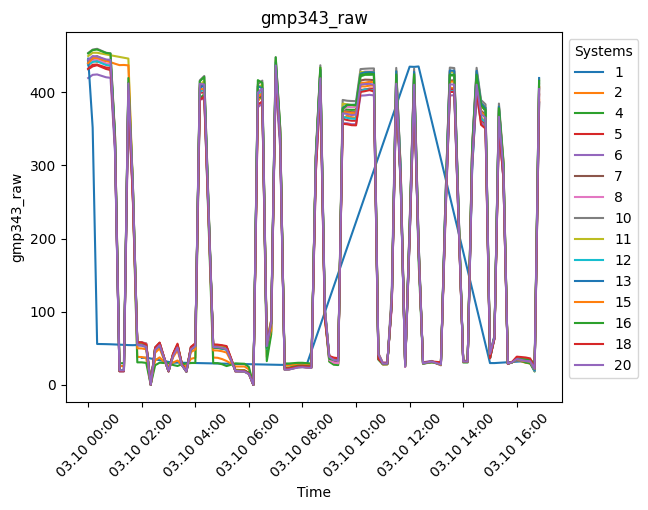

In [76]:
plot_sensor_measurement(df,col_name="gmp343_raw",sensor_id=sensor_id,filter='10m')

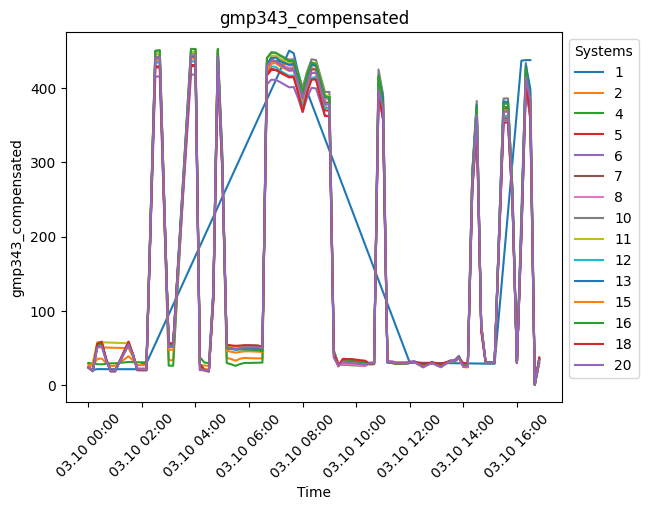

In [55]:
plot_sensor_measurement(df,col_name="gmp343_compensated",sensor_id=sensor_id,filter='10m')

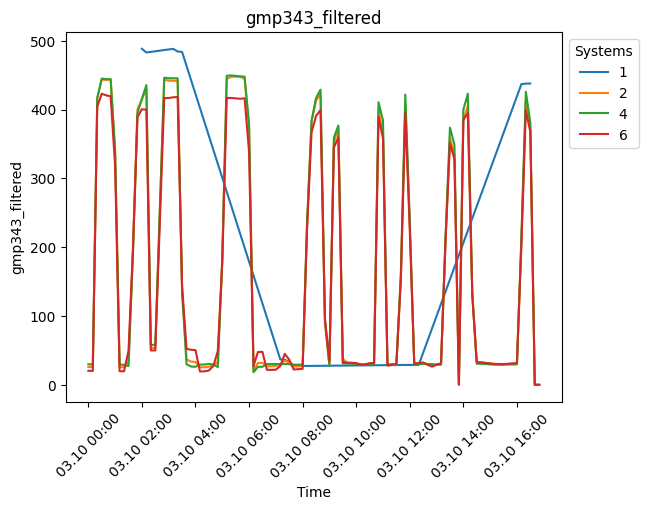

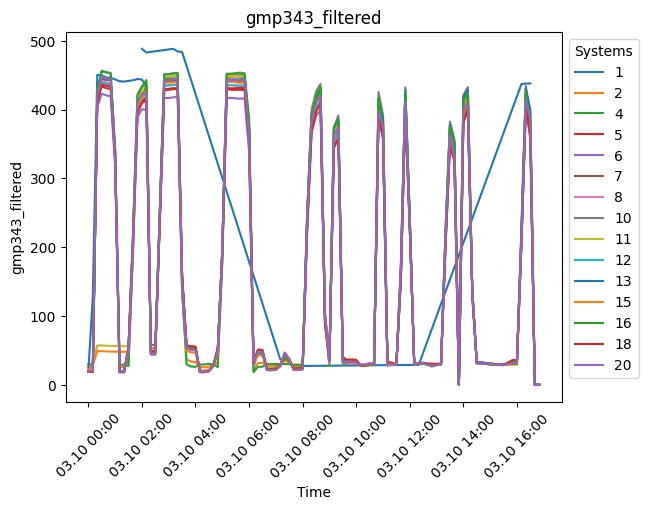

In [78]:
plot_sensor_measurement(df,col_name="gmp343_filtered",sensor_id=[1,2,3,4,6],filter='10m')
plot_sensor_measurement(df,col_name="gmp343_filtered",sensor_id=sensor_id,filter='10m')

In [57]:
# Maisach
plot_wind_rose(df,1, 'Maisach')
# Rechts-der-Isar
plot_wind_rose(df,2, 'Rechts-der-Isar')
# Finsing
plot_wind_rose(df,3, 'Finsing')
# Großhadern
plot_wind_rose(df,4, 'Großhadern')
# plot wind at 3m pole inlet
plot_wind_rose(df,7, 'TUM')

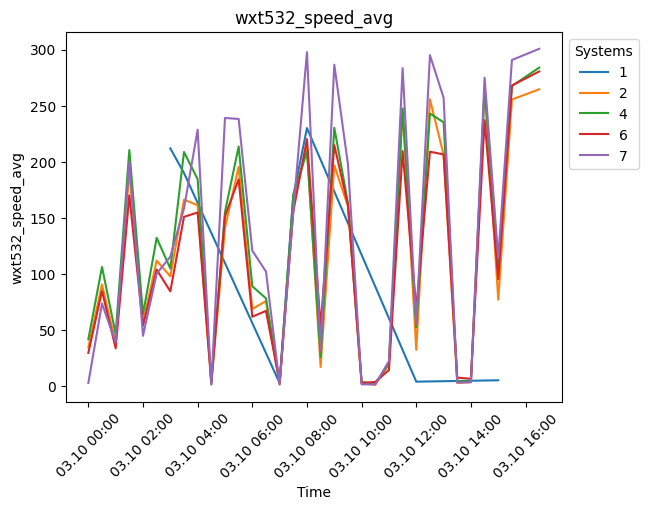

In [58]:
plot_sensor_measurement(df,col_name="wxt532_speed_avg",sensor_id=sensor_id,filter='30m')

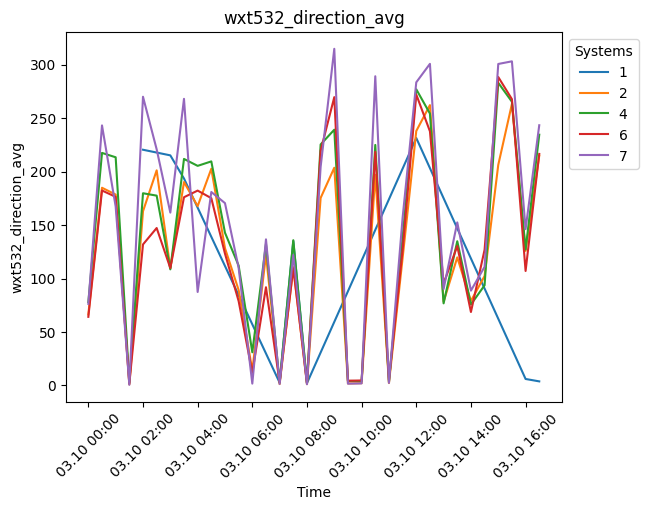

In [59]:
plot_sensor_measurement(df,col_name="wxt532_direction_avg",sensor_id=sensor_id,filter='30m')

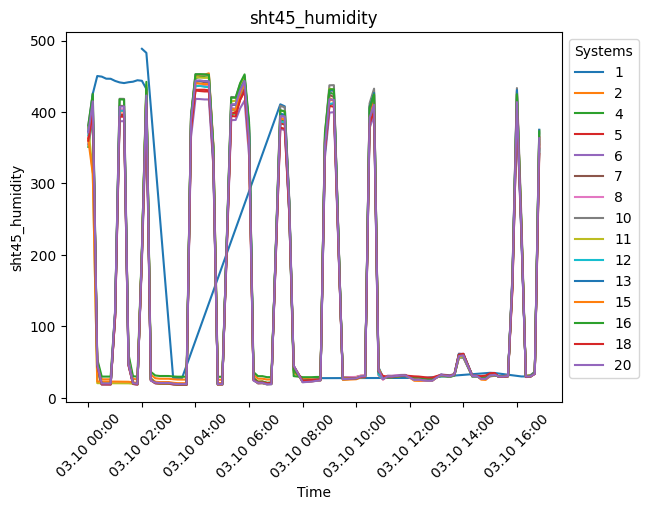

In [60]:
# Plot auxilliary data
plot_sensor_measurement(df,col_name="sht45_humidity",sensor_id=sensor_id,filter='10m')

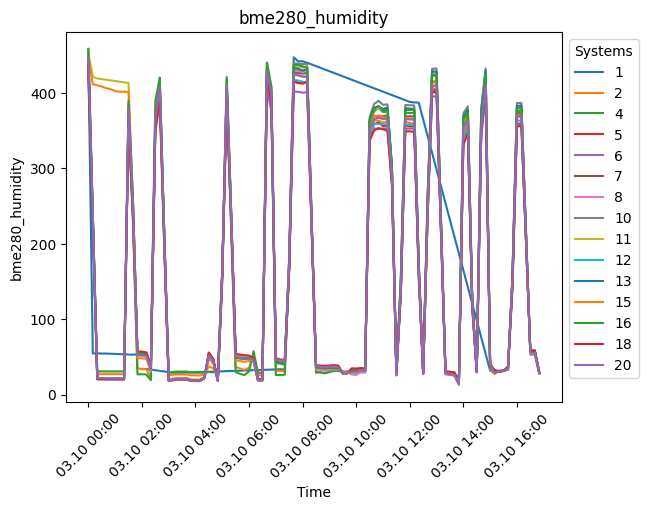

In [61]:
plot_sensor_measurement(df,col_name="bme280_humidity",sensor_id=sensor_id,filter='10m')

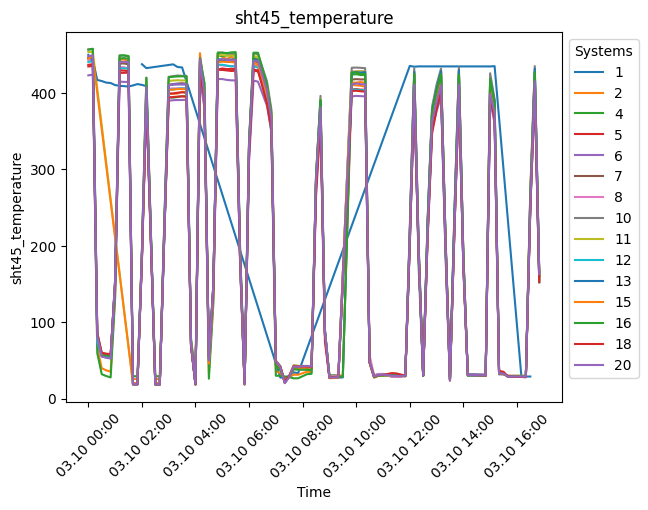

In [62]:
plot_sensor_measurement(df,col_name="sht45_temperature",sensor_id=sensor_id,filter='10m')

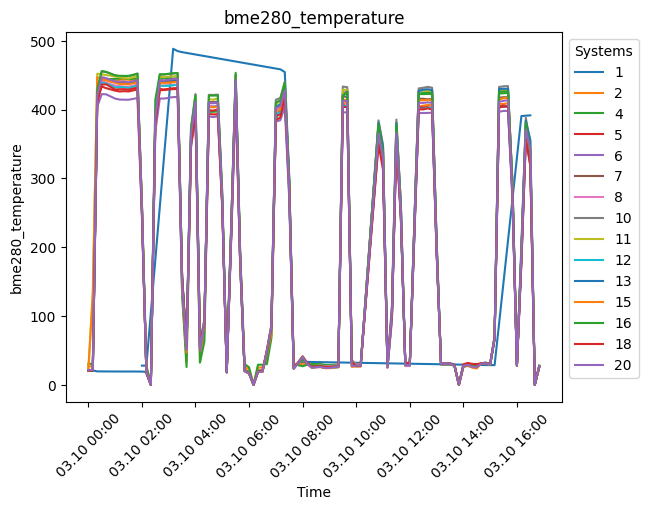

In [63]:
plot_sensor_measurement(df,col_name="bme280_temperature",sensor_id=sensor_id,filter='10m')

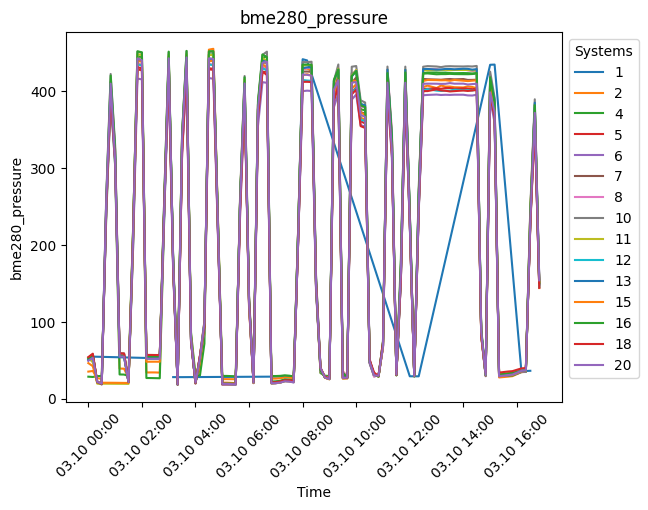

In [64]:
plot_sensor_measurement(df,col_name="bme280_pressure",sensor_id=sensor_id,filter='10m')

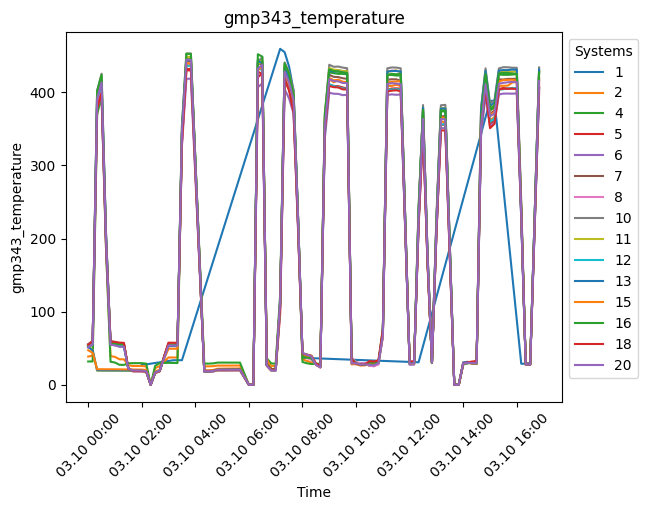

In [65]:
plot_sensor_measurement(df,col_name="gmp343_temperature",sensor_id=sensor_id,filter='10m')

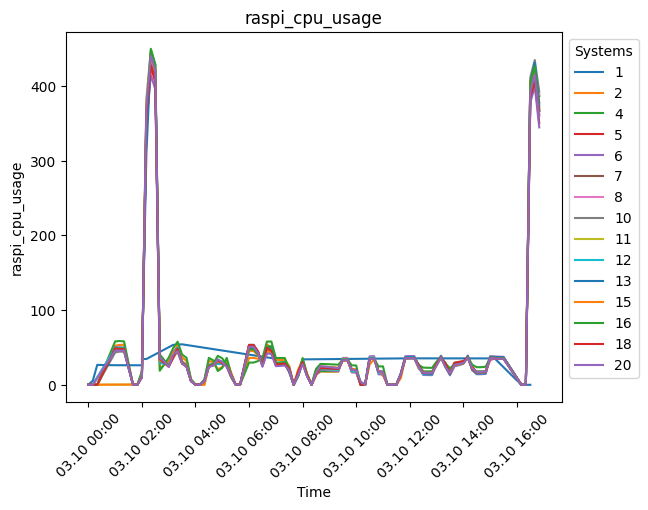

In [66]:
plot_sensor_measurement(df,col_name="raspi_cpu_usage",sensor_id=sensor_id,filter='10m')

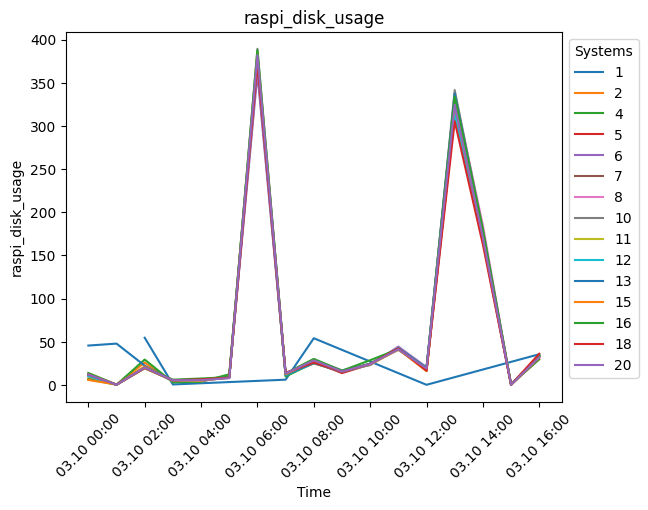

In [67]:
plot_sensor_measurement(df,col_name="raspi_disk_usage",sensor_id=sensor_id,filter='1h')

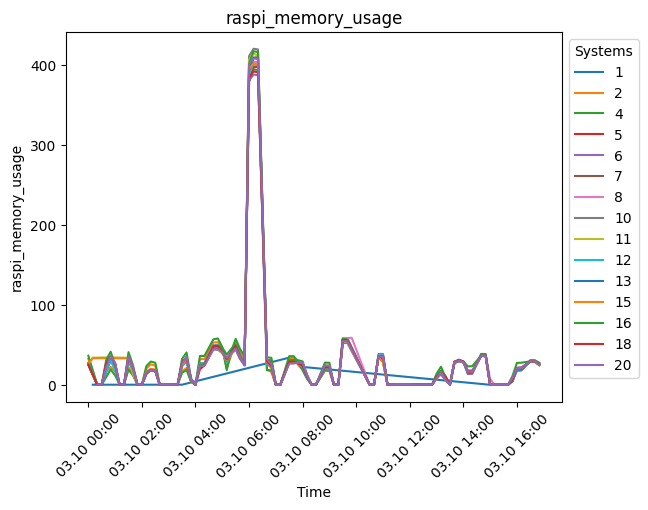

In [68]:
plot_sensor_measurement(df,col_name="raspi_memory_usage",sensor_id=sensor_id,filter='10m')

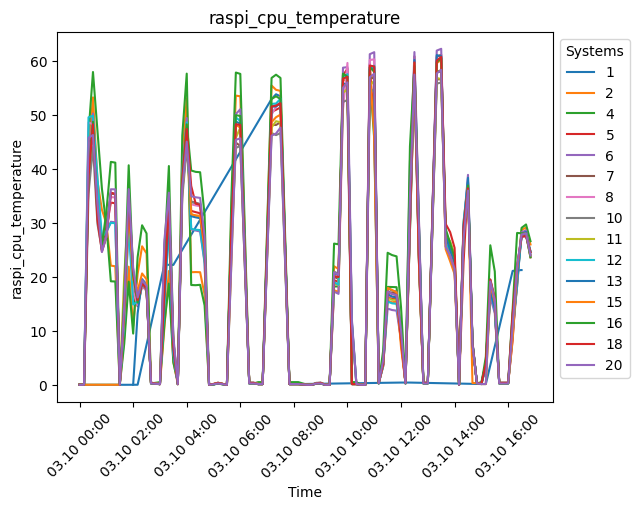

In [69]:
plot_sensor_measurement(df,col_name="raspi_cpu_temperature",sensor_id=sensor_id,filter='10m')

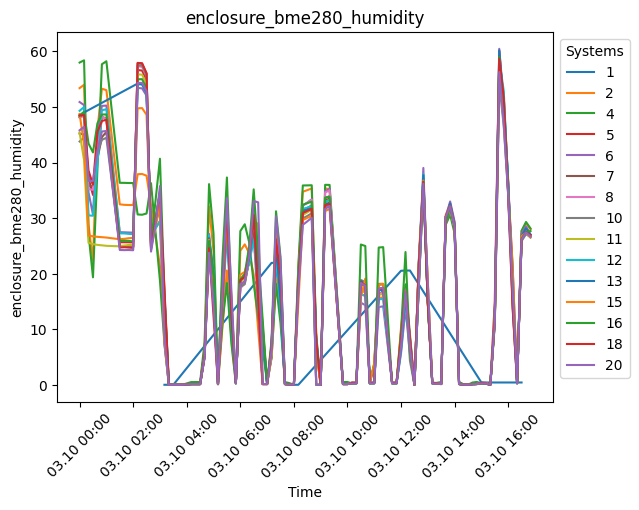

In [70]:
plot_sensor_measurement(df,col_name="enclosure_bme280_humidity",sensor_id=sensor_id,filter='10m')

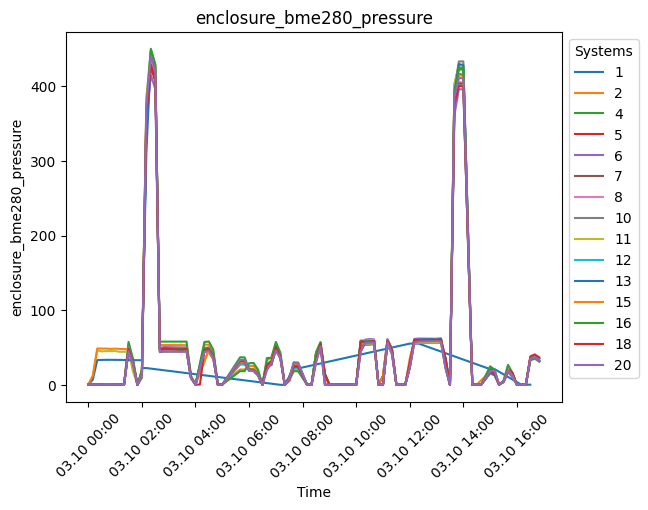

In [71]:
plot_sensor_measurement(df,col_name="enclosure_bme280_pressure",sensor_id=sensor_id,filter='10m')

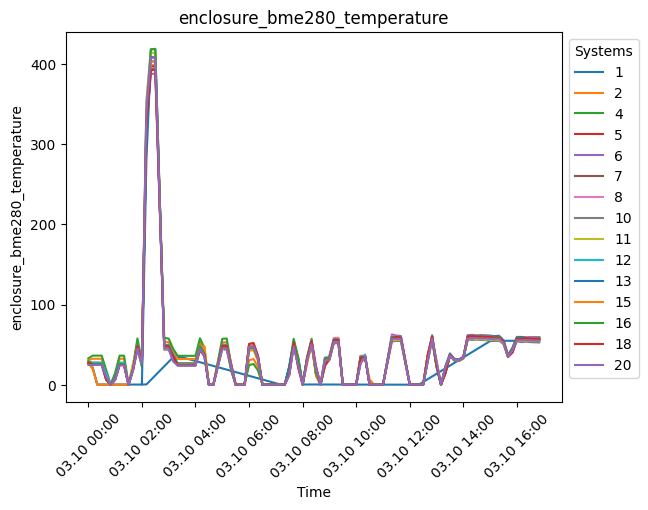

In [72]:
plot_sensor_measurement(df,col_name="enclosure_bme280_temperature",sensor_id=sensor_id,filter='10m')

In [73]:
# Plot Calibration Data 
#plot_sensor_calibration(df, col_name = "cal_gmp343_filtered", sensor_id=[1,2,3,4], filter = None)

In [74]:
# Plot 400ppm Calibration Bottle 
#plot_sensor_calibration(df, col_name = "gmp343_filtered", sensor_id=sensor_id, filter = None, cut_above= 450, cut_below=350)


In [75]:
# Plot 800ppm Calibration Bottle 
#plot_sensor_calibration(df, col_name = "gmp343_filtered", sensor_id=sensor_id, filter = None, cut_below=700)